ライブラリの読み込み


In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [419]:
#フォント設定
plt.rcParams['font.family'] = 'DejaVu Serif' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15 # 全体のフォントサイズが変更されます。
#plt.rcParams['xtick.labelsize'] = 9 # 軸だけ変更されます。
#plt.rcParams['ytick.labelsize'] = 24 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き
#plt.rcParams['axes.grid'] = True # グリッドの作成
#plt.rcParams['grid.linestyle']='--' #グリッドの線種
plt.rcParams["xtick.minor.visible"] = False  #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = False  #y軸補助目盛りの追加
plt.rcParams['xtick.top'] = True  #x軸の上部目盛り
plt.rcParams['ytick.right'] = True  #y軸の右部目盛り


#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
#plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
#plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
#plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ


#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率



In [420]:
files = [r"best_predict_data/Aoki_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_100.csv" ,     r"best_predict_data/Soma_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_120.csv",
r"best_predict_data/Aoki_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_120.csv"  ,    r"best_predict_data/Takase_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_100.csv",
r"best_predict_data/Kinugasa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-3~2_100.csv"  ,r"best_predict_data/Takase_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_120.csv",
r"best_predict_data/Kinugasa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-3~2_120.csv" , r"best_predict_data/Teragiwa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_100.csv",
r"best_predict_data/Masuda_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_100.csv" ,  r"best_predict_data/Teragiwa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_120.csv",
r"best_predict_data/Masuda_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_120.csv" ,  r"best_predict_data/Yatsuda_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_100.csv",
r"best_predict_data/Soma_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_100.csv" ,   r"best_predict_data/Yatsuda_Binary_Random_Standardized_ResNet18_BCEWithLogitsLoss_LRe-4~3_120.csv"]

CSVを読み込み、dfを作成


In [421]:
SUBNAME = "Teragiwa"

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
filepaths = [file for file in files if SUBNAME in file]
print(filepaths)
df = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)



['best_predict_data/Teragiwa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_100.csv', 'best_predict_data/Teragiwa_Binary_Random_Standardized_SmallResNet_BCEWithLogitsLoss_LRe-4~3_120.csv']


重心距離が最小になる閾値を探索


best cog threshold: 0.920, distance: 0.0396
output centroid: (4.0, 2.3), target centroid: (3.9844961240310077, 2.2635658914728682)


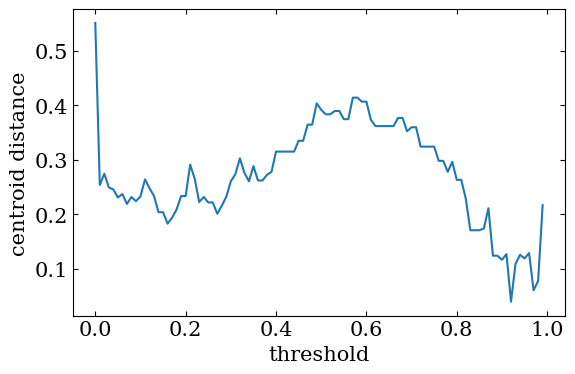

In [422]:
thresholds = np.linspace(0.0, 1.0, 101)
total_per_grid = 8 * 5 * 3

yy, xx = np.indices((8, 5))

def weighted_centroid(mat):
    total = mat.sum()
    if total == 0:
        return np.nan, np.nan
    cy = (yy * mat).sum() / total
    cx = (xx * mat).sum() / total
    return cy, cx

def centroid_distance(threshold):
    hotmap_output = np.zeros((8, 5))
    hotmap_target = np.zeros((8, 5))

    for x, row in df.iterrows():
        idx = x % total_per_grid
        i = idx // (5 * 3)
        j = (idx % (5 * 3)) // 3

        output = sigmoid(row["output"])
        target = row["target"]

        if target > 0:
            hotmap_target[i, j] += 1
        if output > threshold:
            hotmap_output[i, j] += 1

    out_cy, out_cx = weighted_centroid(hotmap_output)
    tgt_cy, tgt_cx = weighted_centroid(hotmap_target)

    if np.isnan(out_cy) or np.isnan(tgt_cy):
        return np.inf, (out_cy, out_cx), (tgt_cy, tgt_cx)

    dist = np.hypot(out_cy - tgt_cy, out_cx - tgt_cx)
    return dist, (out_cy, out_cx), (tgt_cy, tgt_cx)

best_cog_dist = None
best_cog_threshold = None
best_out = None
best_tgt = None

for t in thresholds:
    dist, out_c, tgt_c = centroid_distance(t)
    if best_cog_dist is None or dist < best_cog_dist:
        best_cog_dist = dist
        best_cog_threshold = t
        best_out = out_c
        best_tgt = tgt_c

print(f"best cog threshold: {best_cog_threshold:.3f}, distance: {best_cog_dist:.4f}")
print(f"output centroid: {best_out}, target centroid: {best_tgt}")

plt.figure(figsize=(6, 4))
plt.plot(thresholds, [centroid_distance(t)[0] for t in thresholds])
plt.xlabel("threshold")
plt.ylabel("centroid distance")
plt.tight_layout()
plt.show()


分布距離が最小になる閾値を探索（L1/L2/KL切替）


best distribution threshold (l2): 0.270, distance: 0.0467


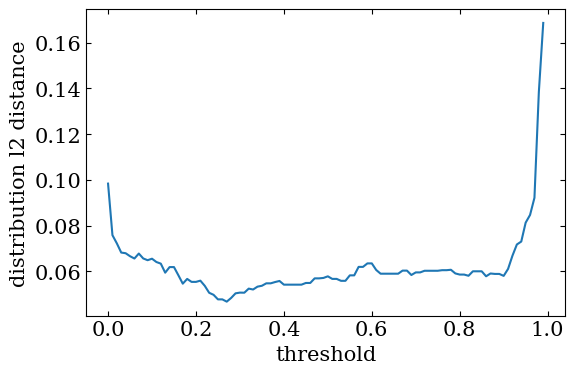

In [423]:
thresholds = np.linspace(0.0, 1.0, 101)
total_per_grid = 8 * 5 * 3

metric = "l2"  # l1, l2, kl

def build_hotmaps(threshold):
    hotmap_output = np.zeros((8, 5))
    hotmap_target = np.zeros((8, 5))

    for x, row in df.iterrows():
        idx = x % total_per_grid
        i = idx // (5 * 3)
        j = (idx % (5 * 3)) // 3

        output = sigmoid(row["output"])
        target = row["target"]

        if target > 0:
            hotmap_target[i, j] += 1
        if output > threshold:
            hotmap_output[i, j] += 1

    return hotmap_output, hotmap_target

def distribution_distance(threshold, metric):
    hotmap_output, hotmap_target = build_hotmaps(threshold)

    out_sum = hotmap_output.sum()
    tgt_sum = hotmap_target.sum()
    if out_sum == 0 or tgt_sum == 0:
        return np.inf

    out_dist = hotmap_output / out_sum
    tgt_dist = hotmap_target / tgt_sum

    if metric == "l1":
        return np.abs(out_dist - tgt_dist).sum()
    if metric == "l2":
        return np.sqrt(((out_dist - tgt_dist) ** 2).sum())
    if metric == "kl":
        eps = 1e-12
        p = np.clip(out_dist, eps, 1.0)
        q = np.clip(tgt_dist, eps, 1.0)
        return (p * np.log(p / q)).sum()
    raise ValueError(f"unknown metric: {metric}")

best_distribution_distance = None
best_distribution_threshold = None

for t in thresholds:
    dist = distribution_distance(t, metric)
    if best_distribution_distance is None or dist < best_distribution_distance:
        best_distribution_distance = dist
        best_distribution_threshold = t

print(f"best distribution threshold ({metric}): {best_distribution_threshold:.3f}, distance: {best_distribution_distance:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(thresholds, [distribution_distance(t, metric) for t in thresholds])
plt.xlabel("threshold")
plt.ylabel(f"distribution {metric} distance")
plt.tight_layout()
plt.show()


ヒートマップに重心を重ねて可視化


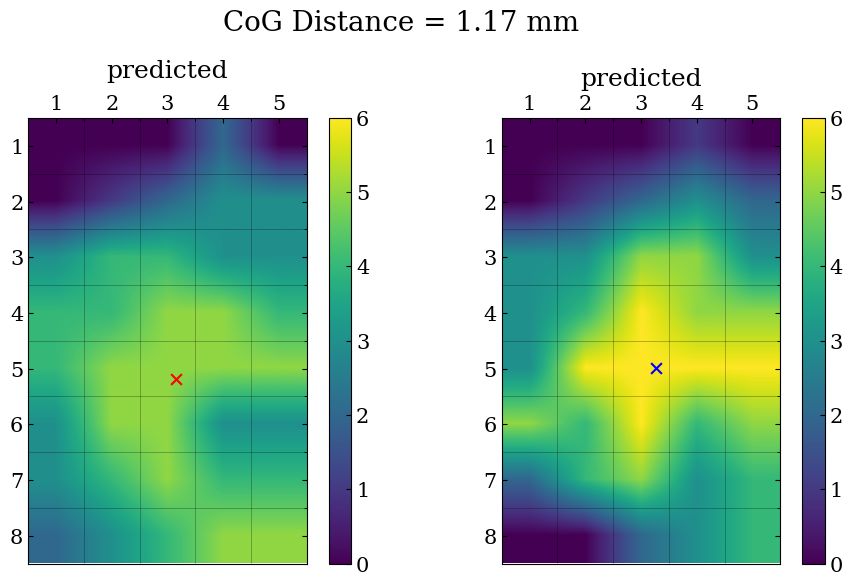

In [ ]:
hotmap_output = np.zeros((8, 5))
hotmap_target = np.zeros((8, 5))

total_per_grid = 8 * 5 * 3

use_threshold = 0.2
#use_threshold = best_distribution_threshold


for x, row in df.iterrows():
    idx = x % total_per_grid
    i = idx // (5 * 3)
    j = (idx % (5 * 3)) // 3

    output = sigmoid(row["output"])
    target = row["target"]

    if target > 0:
        hotmap_target[i, j] += 1
    if output > use_threshold:
        hotmap_output[i, j] += 1

fig, axes = plt.subplots(1, 2, figsize=(9.8, 6))
im0 = axes[0].imshow(hotmap_output, interpolation="bilinear", vmin=0, vmax=6)
axes[0].set_title("predicted", pad=12)
axes[0].set_xticks(np.arange(0, 5, 1))
axes[0].set_xticklabels(np.arange(1, 6, 1))
axes[0].set_yticks(np.arange(0, 8, 1))
axes[0].set_yticklabels(np.arange(1, 9, 1))
axes[0].xaxis.tick_top()
axes[0].set_xticks(np.arange(-0.5, 5, 1), minor=True)
axes[0].set_yticks(np.arange(-0.5, 8, 1), minor=True)
axes[0].grid(which="minor", color="black", alpha=0.3, linewidth=0.6)
axes[0].tick_params(which="minor", bottom=False, left=False)
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(hotmap_target, interpolation="bilinear", vmin=0, vmax=6)
axes[1].set_title("target")
axes[1].set_xticks(np.arange(0, 5, 1))
axes[1].set_xticklabels(np.arange(1, 6, 1))
axes[1].set_yticks(np.arange(0, 8, 1))
axes[1].set_yticklabels(np.arange(1, 9, 1))
axes[1].xaxis.tick_top()
axes[1].set_xticks(np.arange(-0.5, 5, 1), minor=True)
axes[1].set_yticks(np.arange(-0.5, 8, 1), minor=True)
axes[1].grid(which="minor", color="black", alpha=0.3, linewidth=0.6)
axes[1].tick_params(which="minor", bottom=False, left=False)
fig.colorbar(im1, ax=axes[1])

cog_distance, _, _ = centroid_distance(use_threshold)
plt.suptitle(f"CoG Distance = {cog_distance*5:.2f} mm", fontsize=20, fontweight=500)

yy, xx = np.indices(hotmap_output.shape)

def weighted_centroid(mat):
    total = mat.sum()
    if total == 0:
        return np.nan, np.nan
    cy = (yy * mat).sum() / total
    cx = (xx * mat).sum() / total
    return cy, cx

out_cy, out_cx = weighted_centroid(hotmap_output)
tgt_cy, tgt_cx = weighted_centroid(hotmap_target)

axes[0].scatter([out_cx], [out_cy], c="red", s=60, marker="x")
axes[1].scatter([tgt_cx], [tgt_cy], c="blue", s=60, marker="x")
plt.tight_layout()
plt.show()


In [425]:
print(hotmap_target)

[[0. 0. 0. 1. 0.]
 [0. 1. 2. 3. 2.]
 [3. 3. 5. 5. 3.]
 [3. 4. 6. 5. 5.]
 [3. 6. 6. 6. 6.]
 [5. 4. 6. 4. 5.]
 [2. 4. 5. 3. 4.]
 [0. 0. 2. 3. 4.]]


In [ ]:
values = np.array([1.37, 4.81, 3.46, 2.41, 1.41, 1.64, 1.17])
mean = values.mean()
std = values.std(ddof=1)  # sample standard deviation
print(f"mean = {mean:.3f}, std = {std:.3f}")


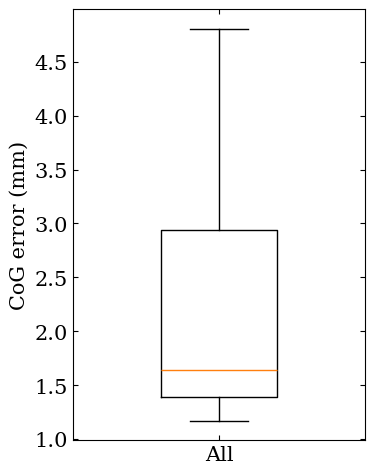

In [431]:
values = np.array([1.37, 4.81, 3.46, 2.41, 1.41, 1.64, 1.17])
plt.figure(figsize=(4, 5))
plt.boxplot(values, vert=True, widths=0.4)
plt.ylabel("CoG error (mm)")
plt.xticks([1], ["All"])
plt.tight_layout()
plt.show()
